In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts')
import numerics
import cdd
import torch
from importlib import reload
import style
from os.path import join
reload(numerics)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = list(prop_cycle.by_key()['color'])

from run_fp_sims import param_sets_1, param_sets_2

WE'RE DOING IT OMGGGG


In [2]:
"""
Prints out parameter values
"""

"""
P = 5
for i in range(3):
    a = np.ones(P)*2.
    b = np.ones(P)*2.5
    np.random.seed(i)
    for j in range(i):
        a[j] = 2.5
        b[j] = 2.
    a += np.random.randn(P)*0.04
    b += np.random.randn(P)*0.04
    plt.plot(a, marker='.')
    plt.plot(b, marker='.')
    plt.ylim(1, 2.75)
    plt.show()
    print('a = np.'+repr(a))
    print('b = np.'+repr(b))
    print('g = np.'+repr(np.zeros(5)))
    
P = 5
gg = [1.5, 2.25, 2.65]
for i in range(3):
    a = np.ones(P)*2.
    b = np.ones(P)*2.5
    g = np.ones(P)*1.2
    np.random.seed(i)
    a += np.random.randn(P)*0.04
    b += np.random.randn(P)*0.04
    g += np.random.randn(P)*0.04
    g[0] = gg[i]
    #g[-1] = 1.8
    plt.plot(a, marker='.')
    plt.plot(b, marker='.')
    plt.plot(g, marker='.')
    plt.ylim(1, 2.75)
    plt.show()
    print('a = np.'+repr(a))
    print('b = np.'+repr(b))
    print('g = np.'+repr(g))
"""
pass

In [11]:
"""
Load data
"""

mode = 1

if mode == 0:
    param_sets = param_sets_2
    data = np.load("../cluster_output/fp_results_v5/results.npz")
    fname = 'diff_cases_1.pdf'
elif mode == 1:
    param_sets = param_sets_1
    data = np.load("../cluster_output/fp_results_v4/results.npz")
    fname = 'diff_cases_2.pdf'

    
all_C, all_S, all_X = data['all_C'], data['all_S'], data['all_X']
dt = 0.25

In [8]:
"""
Plotting stuff
"""

def make_axes():
    fig_width = 3.375
    fig_height = 3.7
    fig = plt.figure(figsize=(fig_width, fig_height), dpi=120)
    
    fig_lpad = 0.125
    fig_rpad = 0.125
    subfig_width = (fig_width-fig_lpad-fig_rpad) / 3
    
    
    subfigs = fig.subfigures(1, 5, wspace=0., width_ratios=[fig_lpad]+[subfig_width]*3+[fig_rpad])[1:4]
    #import matplotlib.gridspec as gridspec
    #gs = gridspec.GridSpec(1, 3)
    #gs.update(left=0.1, right=0.9)
    #subfigs = [fig.add_subfigure(gs[0, i]) for i in range(3)]
    
    #subfigs[0].set_facecolor("0.2")
    #subfigs[1].set_facecolor("0.4")
    #subfigs[2].set_facecolor("0.6")


    lpad = 0.15
    rpad = 0.025
    tpad = 0.01
    bpad = 0.07
    midpad_traces = 0.1
    midpad_sq = 0.075
    sq_width = 0.5
    top_height = 0.15
    vpad_1 = 0.1
    vpad_2 = 0.1
    vpad_traces = 0.015
    cbar_height = 0.02
    cbar_pad = 0.015

    sq_height = sq_width*subfig_width/fig_height
    top_width = 1-lpad-rpad
    traces_height = 1-tpad-top_height-vpad_1-vpad_2-sq_height-bpad
    trace_height = (traces_height-4*vpad_traces)/5.
    trace_width = (1-lpad-rpad-midpad_traces)/2

    ax1_width = 1-lpad-rpad-sq_width-midpad_sq
    ax1_height = sq_height

    all_ax_dicts = []
    for subfig_idx in range(3):
        fig_ = subfigs[subfig_idx]
        ax_dict = {}
        ax_sq = fig_.add_axes((lpad, bpad, sq_width, sq_height))
        ax1 = fig_.add_axes((lpad+sq_width+midpad_sq,
                            bpad, ax1_width, ax1_height))
        all_ax_trace = []
        for i in range(5):
            y_cord = 1-tpad-top_height-vpad_1-trace_height-i*(vpad_traces+trace_height)
            ax_trace_left_i = fig_.add_axes((
                lpad, y_cord, trace_width, trace_height))
            ax_trace_right_i = fig_.add_axes((
                lpad+trace_width+midpad_traces, y_cord, trace_width, trace_height))
            all_ax_trace.append([ax_trace_left_i, ax_trace_right_i])

        ax_top = fig_.add_axes((
            lpad, 1-tpad-top_height, top_width, top_height))

        #ax_sq.set_facecolor('red')
        #ax1.set_facecolor('red')
        if subfig_idx == 0:
            ax_cbar = fig_.add_axes((lpad, bpad-cbar_height-cbar_pad, sq_width, cbar_height))
            #ax_cbar.set_facecolor('red')

        ax_dict['top'] = ax_top
        ax_dict['traces'] = all_ax_trace
        ax_dict['bottom'] = [ax_sq, ax1, ax_cbar]
        all_ax_dicts.append(ax_dict)
    return all_ax_dicts

#all_ax_dicts = make_axes()

In [9]:
def plot_traces(ax, t, X, color, random_alpha=False, lw=1):
    for i in range(X.shape[1]):
        ax.plot(
            t, X[:, i], color=color if type(color) != list else color[i],
            alpha=0.2+np.random.rand()*0.8 if random_alpha else 1,
            lw=lw, clip_on=False)
    ax.set_xlim(t[0], t[-1])
    
def plot_S_mat(ax, S_mat, cax=None):
    v = 2
    mat = ax.matshow(S_mat, vmin=-v, vmax=v, cmap='RdGy')#, interpolation="none")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    if cax is not None:
        plt.colorbar(mappable=mat, cax=cax, orientation='horizontal')
    
def plot_params(ax, a, b, g, legend=False):
    index = np.arange(len(a)) + 1
    ax.plot(index, a, marker='.', color='0.7', label="$a^{\mu}$")
    ax.plot(index, b, marker='.', color='black', label="$b^{\mu}$")
    ncol = 2
    if not np.all(g == 0.):
        ax.plot(index, g, marker='.', color='green', label="$g^{\mu}$")
        ncol += 1
    ax.set_xticks(index)
    ax.set_ylim(1, 3)
    ax.set_yticks([1,2,3])
    if legend:
        ax.legend(
            ncol=ncol, handlelength=1, handletextpad=0.2, columnspacing=0.5
            ,loc='upper center', borderaxespad=-.75)
        
def compute_A_pred(a, b, g):
    P = len(a)
    param = np.maximum(a, b)
    if np.all(g == 0.):
        return numerics.compute_psi_inv(1./param)
    Delta_0 = numerics.compute_psi_inv(1./param)
    Delta_inf = np.array([numerics.compute_Delta_inf(Delta_0[i], g[i], x0=1.5) for i in range(P)])
    A_pred = numerics.compute_A(Delta_inf, Delta_0, g)
    A_pred[np.isnan(A_pred)] = -1
    A_pred[A_pred < 0.] = 0.
    return A_pred
        
def plot_row_sums(ax, a, b, g, S_mats_all):
    A_actual = (S_mats_all**2).sum(-1)    
    P = S_mat.shape[0]
    for i in range(P):
        ax.scatter(
            np.sqrt(A_actual[:, P-1-i]), np.ones(P)*(1+i),
            color='red', s=2, clip_on=False, marker='.')
    A_pred = compute_A_pred(a, b, g)
    ax.scatter(np.sqrt(A_pred)[::-1], 1+np.arange(P), 
               color='blue', s=3, clip_on=False, lw=0)
    ax.set_ylim(.5, 5.5)
    ax.set_xlim(0, 2.5)
    ax.set_yticks(np.arange(5)+1)
    ax.set_yticklabels([5,4,3,2,1])
    ax.yaxis.tick_right()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    

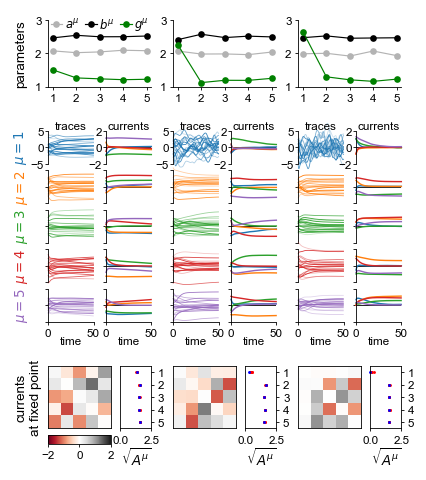

In [10]:
all_ax_dicts = make_axes()

run_idx = 2 #arbitrary
N_t_cutoff = 200

#plot traces
for param_set_idx  in range(3):
    t = np.arange(N_t_cutoff)*dt
    for i in range(5):
        ax_l, ax_r = all_ax_dicts[param_set_idx]['traces'][i]
        plot_traces(
            ax_l, t, all_X[param_set_idx, run_idx, 5:N_t_cutoff+5, i, :20],
            color=colors[i], random_alpha=True, lw=0.5)
        plot_traces(
            ax_r, t, all_S[param_set_idx, run_idx, 5:N_t_cutoff+5, i, :],
            color=colors, lw=0.85)
        ax_l.set_ylim(-5, 5)
        ax_r.set_ylim(-2, 2)
        ax_r.axhline(0, ls='-', color='black', zorder=0, lw=0.5)
        if i == 0:
                ax_l.set_title("traces", fontsize=7, pad=0)#, va='top')
                ax_r.set_title("currents", fontsize=7, pad=0)#, va='top')
        if param_set_idx == 0:
            ax_l.set_ylabel("$\mu={}$".format(i+1), color=colors[i],
                           labelpad=8.5 if i > 0 else 1)
        for ax in (ax_l, ax_r):
            ax.tick_params(axis='y', which='major', pad=0.5)
            if i > 0:
                ax.set_yticklabels([])
            if i < 4:
                ax.set_xticks([])
                ax.spines['bottom'].set_visible(False)
            if i == 4:
                ax.set_xticks([0, dt*N_t_cutoff])
                ax.set_xlabel("time", labelpad=-1, fontsize=7)
                
#plot mats and row sums
for param_set_idx in range(3):
    axes = all_ax_dicts[param_set_idx]['bottom']
    ax_sq, ax_row_sum = axes[:2]
    S_mat = all_S[param_set_idx, run_idx, 200]
    plot_S_mat(ax_sq, S_mat, cax=axes[-1] if param_set_idx==0 else None )
    if param_set_idx == 0:
        ax_sq.set_ylabel("currents\nat fixed point", labelpad=4)
    
    a, b, g = param_sets[param_set_idx]
    plot_row_sums(ax_row_sum, a, b, g,
                  S_mats_all=all_S[param_set_idx, :, 200]) #need to get final S_mats from all runs
    ax_row_sum.set_xlabel("$\sqrt{A^{\mu}}$", labelpad=1)
    
#plot params
for param_set_idx in range(3):
    ax = all_ax_dicts[param_set_idx]['top']
    a, b, g = param_sets[param_set_idx]
    plot_params(ax, a, b, g, legend=(param_set_idx==0))
    if param_set_idx == 0:
        ax.set_ylabel("parameters", labelpad=4.75)
    

#plt.savefig(join('../figs', fname), dpi=450)
plt.show()

In [16]:
"""
a, b, g = param_sets[0]

h = a - b
u = np.array([1, 1, 1, -1, -1])*np.sqrt(b)
T = numerics.make_T_from_uh(u, h)

#T = numerics.make_T(a,b)
U = np.array([np.eye(P) for _ in range(P)])
n, m = numerics.sample_nm(T=T, U=U, N=500000)
X, S = numerics.run_sim(T_sim=100, T_eval=1, dt=0.1,
                        n_vecs=torch.Tensor(n).to(0), m_vecs=torch.Tensor(m).to(0),
                        g_vals=torch.Tensor(g).to(0), verbose=True, init_std=2.5)
"""

pass